In [38]:
import glob
import pandas as pd
import os

In [41]:
cd ~/Downloads/s8/clinic/clean-data/

/home/lillian/drive/mudd-archive/s7/clinic/clean-data


In [42]:
files = sorted(glob.glob('tarsalis_data_clean/*'))
#files = sorted(glob.glob('aegypti_data_clean/*'))

In [43]:
files

['tarsalis_data_clean/cxthand1sep2021no1.csv',
 'tarsalis_data_clean/cxthand1sep2021no7.csv',
 'tarsalis_data_clean/cxthand30aug2021no11.csv',
 'tarsalis_data_clean/cxthand30aug2021no12.csv',
 'tarsalis_data_clean/cxthand30aug2021no2.csv',
 'tarsalis_data_clean/cxthand8sep2021no1.csv',
 'tarsalis_data_clean/cxthand8sep2021no4.csv',
 'tarsalis_data_clean/cxthand8sep2021no8.csv',
 'tarsalis_data_clean/cxtonhand10nov2021no10.csv',
 'tarsalis_data_clean/cxtonhand10nov2021no11.csv',
 'tarsalis_data_clean/cxtonhand10nov2021no5.csv',
 'tarsalis_data_clean/cxtonhand10nov2021no7.csv',
 'tarsalis_data_clean/cxtonhand14dec2021no1.csv',
 'tarsalis_data_clean/cxtonhand14jan2021no1.csv',
 'tarsalis_data_clean/cxtonhand14jan2021no3.csv',
 'tarsalis_data_clean/cxtonhand14jan2021no8.csv',
 'tarsalis_data_clean/cxtonhand18nov2021no4.csv',
 'tarsalis_data_clean/cxtonhand18nov2021no8.csv',
 'tarsalis_data_clean/cxtonhand19nov2021no2b.csv',
 'tarsalis_data_clean/cxtonhand19nov2021no5.csv',
 'tarsalis_data_

In [44]:
len(files)

62

In [45]:
dfs = [pd.read_csv(f) for f in files]
dfs_dict = {os.path.basename(f): pd.read_csv(f) for f in files}

In [46]:
last_time = [df['time'].iloc[-1] for df in dfs]

In [47]:
total_time = sum(last_time)
total_time / 3600

np.float64(17.449894444444443)

In [68]:
!mkdir -p /tmp/tmp
for file, df in zip(files, dfs):
    plt.figure(figsize=(8,6))
    plt.plot(df['time'], df['pre_rect'],  label='pre_rect')
    plt.plot(df['time'], df['post_rect'], label='post_rect')
    plt.legend()
    plt.grid()
    plt.xlabel('time [s]')
    plt.ylabel('voltage [V]')
    plt.title(os.path.basename(file))
    plt.savefig(f'/tmp/tmp/{os.path.basename(file)}.png')
    plt.close()

In [70]:
file = 'cxthand30aug2021no12.csv'
df = dfs_dict[file]
plt.figure(figsize=(8,6))
plt.plot(df['time'], df['pre_rect'],  label='pre_rect')
plt.plot(df['time'], df['post_rect'], label='post_rect')
plt.legend()
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('voltage [V]')
plt.title(os.path.basename(file))
plt.savefig('/tmp/clipping.pdf')
plt.show()
plt.close()

In [18]:
cd /home/lillian/projects/hmc-courses/s8/USDA-Auburn/GUI

/home/lillian/drive/projects/hmc-courses/s8/USDA-Auburn/GUI


In [19]:
ls

build/         EPGData.py       models/           scido.spec          windaq.py
build.ps1      FileSelector.py  ModelSelector.py  Settings.py
build.sh*      Labeler.py       ProbeSplitter.py  SettingsWindow.py
DataWindow.py  main.py          requirements.txt  test_recording.csv
dist/          model.pkl        SCIDO.png         venv/


In [20]:
import windaq

In [22]:
w = windaq.windaq('/home/lillian/CxT hand 1Sep2021 no7.WDQ')
w

In [24]:
w.engUnits

[(b'V', b'o', b'l', b't', b'\x00', b'\x00'),
 (b'V', b'o', b'l', b't', b'\x00', b'\x00'),
 (b'V', b'o', b'l', b't', b'\x00', b'\x00'),
 (b'V', b'o', b'l', b't', b'\x00', b'\x00'),
 (b'V', b'o', b'l', b't', b'\x00', b'\x00'),
 (b'V', b'o', b'l', b't', b'\x00', b'\x00'),
 (b'V', b'o', b'l', b't', b'\x00', b'\x00'),
 (b'V', b'o', b'l', b't', b'\x00', b'\x00')]

In [28]:
w.unit(0)

'Volt\x00\x00'

In [29]:
dfs[0]

,Unnamed: 0,resistance,voltage,current,time,pre_rect,post_rect,labels
0,0,6,250,DC,0.00,-8.012695,0.017090,NP
1,1,6,250,DC,0.01,-8.006592,0.019531,NP
2,2,6,250,DC,0.02,-8.023682,0.020752,NP
3,3,6,250,DC,0.03,-8.018799,0.020752,NP
4,4,6,250,DC,0.04,-8.034668,0.019531,NP
...,...,...,...,...,...,...,...,...
84757,84757,6,250,DC,847.57,0.003662,7.438965,NP
84758,84758,6,250,DC,847.58,0.003662,7.438965,NP
84759,84759,6,250,DC,847.59,0.003662,7.437744,NP
84760,84760,6,250,DC,847.60,0.002441,7.438965,NP


In [64]:
%matplotlib qt
for file, df in zip(files, dfs):
    plt.figure()
    plt.plot(df['time'], df['pre_rect'],  label='pre_rect')
    plt.plot(df['time'], df['post_rect'] - df['post_rect'].mean() + df['pre_rect'].mean(), label='post_rect')
    plt.title(df['current'].iloc[0])
    plt.legend()
    #plt.savefig(f'/tmp/tmp/{os.path.basename(file)}.png')
    plt.show(block=True)

KeyboardInterrupt: 

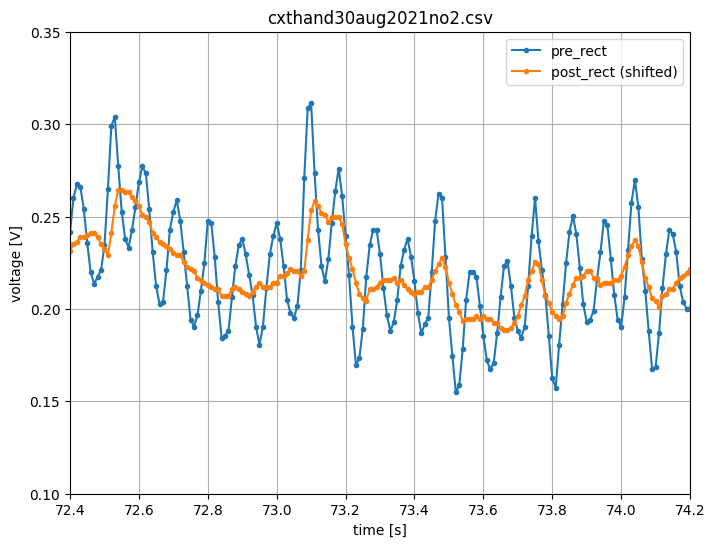

In [69]:
%matplotlib inline
f = 'cxthand30aug2021no2.csv'
dfi = dfs_dict[f]
plt.figure(figsize=(8,6))
plt.plot(dfi["time"], dfi["pre_rect"],  label="pre_rect", marker='.')
plt.plot(dfi["time"], dfi["post_rect"] - dfi["post_rect"].mean() + dfi["pre_rect"].mean(), label="post_rect (shifted)", marker='.')
plt.xlabel("time [s]")
plt.ylabel("voltage [V]")
plt.xlim(72.4, 74.2)
plt.ylim(0.1, 0.35)
plt.title(f)
plt.legend()
plt.grid()
plt.savefig('/tmp/aliasing.pdf')
plt.show()